# Part II: Connecting Python to SQL

Submitted by: Viren Suresh Patel

<hr  style="border:2px solid orange;border-radius:50%;" />

## Preparing the Work Station.

### Installing MYSQL connector.

In [1]:
!pip install mysql-connector-python

<hr  style="border:1px dashed red;border-radius:50%;" />

### Importing the packages.

In [16]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

<hr  style="border:1px dashed red;border-radius:50%;" />

### Connecting the database.

In [3]:
conn = mysql.connector.connect(host='127.0.0.1', database='terpbuy', user='root', password='<!Sc3venZovski>')

<hr  style="border:1px dashed red;border-radius:50%;" />

### Helper function for initializing visualization plots.

In [4]:
def create_base_plot(figsize=(16, 8), enable_grid=True):
    """
    Helper Function creates and Empty plot with theme.

    Arguments
    ---------
    figsize: tuple
        The size of figure (height, width)

    Returns
    --------
    fig, ax
    """
    style.use('fast')
    fig, ax = plt.subplots(figsize=figsize)
    if enable_grid:
        ax.grid(color='grey', alpha=0.3)
    plt.rcParams['font.family'] = 'serif'
    return fig, ax

<hr  style="border:2px solid orange;border-radius:50%;" />

## Question 1

- Write a query to show the quantity of items sold by each department.
- Sort the results by department name.

In [5]:
dept_wise_quantity_sold = pd.read_sql("""
    SELECT
    	d.department_name,
        SUM(ol.quantity_sold) AS 'Total quantity of items sold'
    FROM
    	department AS d
        INNER JOIN product AS p ON p.department_id = d.department_id
        INNER JOIN order_line AS ol ON ol.product_id = p.product_id
    GROUP BY d.department_name
    ORDER BY d.department_name;
""", conn)

C:\Users\Vr3n\AppData\Local\Temp\ipykernel_14924\3772743192.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dept_wise_quantity_sold = pd.read_sql("""


In [6]:
dept_wise_quantity_sold

,department_name,Total quantity of items sold
0,Apparel,2336.0
1,Book Shop,12.0
2,Discs Shop,285.0
3,Fan Shop,2406.0
4,Fitness,244.0
5,Footwear,932.0
6,Golf,2355.0
7,Health and Beauty,64.0
8,Outdoors,812.0
9,Pet Shop,54.0


<hr  style="border:2px solid orange;border-radius:50%;" />

## Question 2

- Using the query you wrote in Question 1, create a data visualization (e.g., a bar chart) showing all departments and the number of items each of them sold.
- Using a markdown cell, explain what you observe from the analysis.

<hr  style="border:1px dashed red;border-radius:50%;" />

### 2.1: Plotting the bar graph

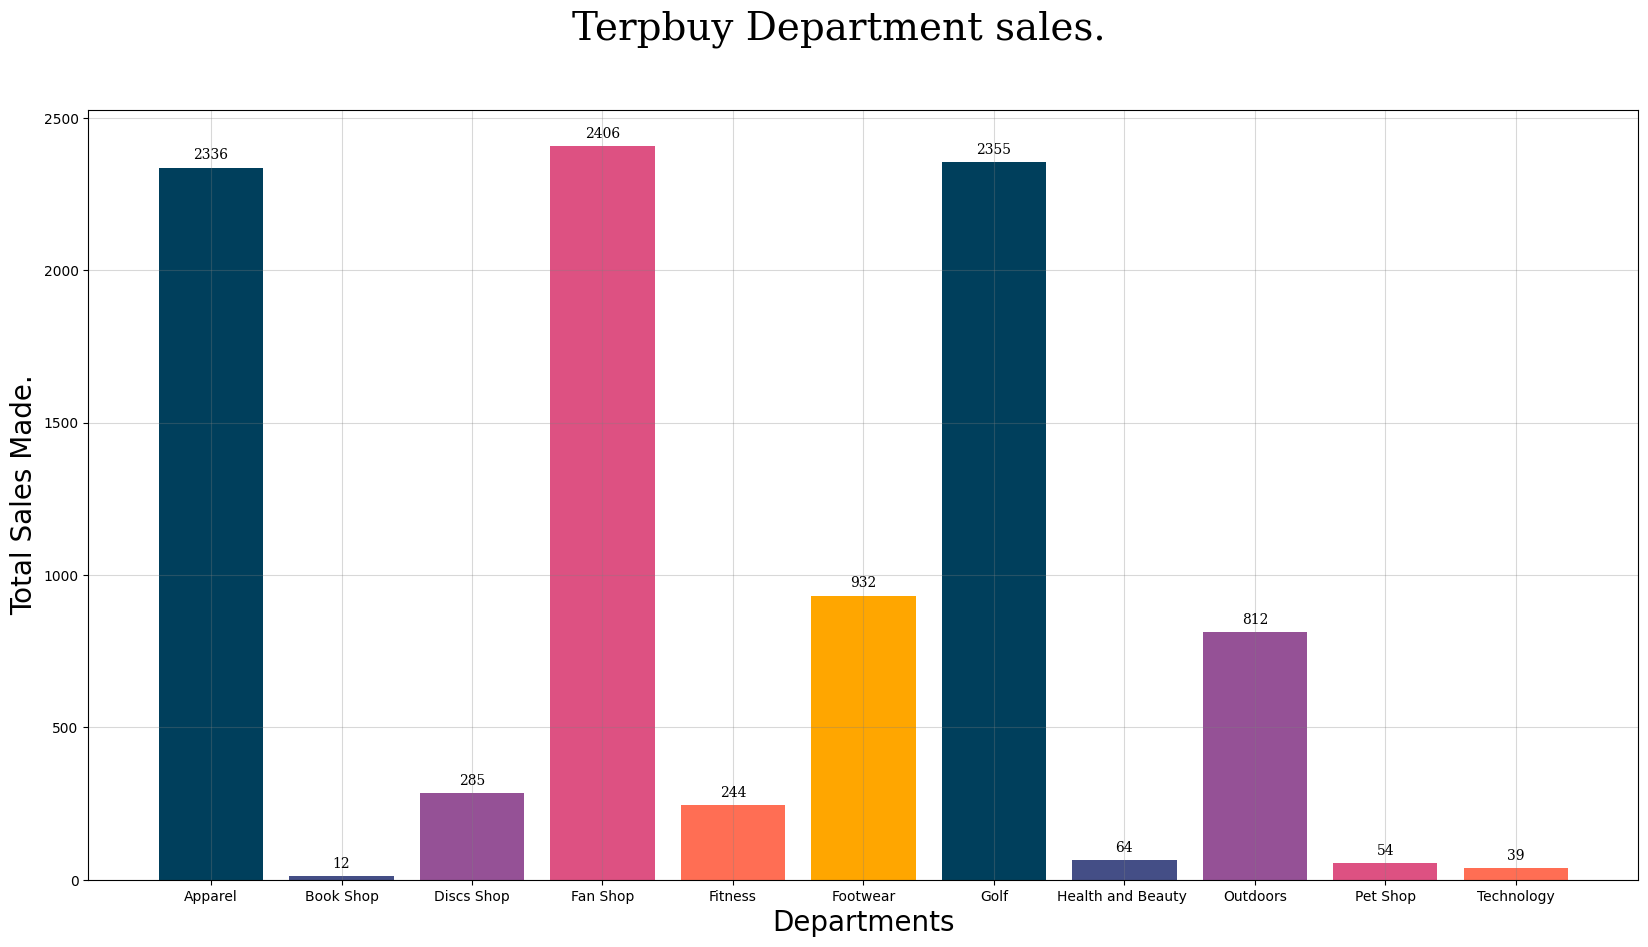

In [7]:
# Theme colors for the plot.
colors = ["#003f5c","#444e86","#955196","#dd5182","#ff6e54", "#ffa600"]


fig, ax = create_base_plot(figsize=(20, 10))

bar_graph = ax.bar(dept_wise_quantity_sold['department_name'], dept_wise_quantity_sold['Total quantity of items sold'], color=colors)

# Set the Title of the plot.
fig.suptitle('Terpbuy Department sales.', fontsize=28)

# Bar labels of the rectangle.
ax.bar_label(bar_graph, padding=4)

ax.set_xlabel('Departments', fontsize=20)
ax.set_ylabel('Total Sales Made.', fontsize=20)
plt.show()

<hr  style="border:1px dashed red;border-radius:50%;" />

### 2.2: Bar Graph Summary.

The chart describes sales made by individual departments in Terpbuy.

1. The top 3 departments to sell most number of items are:
   1. Fan Shop - 2406
   2. Golf - 2355
   3. Apparel - 2336
   
2. The departments with lowest number of items sales are:
   1. Book Shop - 12
   2. Technology - 39
   3. Pet Shop - 54
   4. Health and Beauty - 64

3. Departments with items sold above 100 and below 1000 are:
   1. Footwear - 932
   2. Outdoors - 812
   3. Discs Shop - 285
   4. Fitness - 244

4. Most Item Sales is from ___Fan Shop___ department ___(2406)___.
5. Lowest Item Sales is from ___Book Shop___ department ___(12)___.

<hr  style="border:2px solid orange;border-radius:50%;" />

## Question 3

Write a query to show the number of orders placed in each year in which at least one order was placed.

In [8]:
yearly_orders_df = pd.read_sql("""
SELECT
	YEAR(o.order_date) AS 'Year',
	COUNT(o.order_id) AS 'Number of Orders Placed'
FROM
	orders AS o
GROUP BY YEAR(o.order_date)
HAVING COUNT(o.order_id) >= 1;
""", conn)

C:\Users\Vr3n\AppData\Local\Temp\ipykernel_14924\2453036470.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  yearly_orders_df = pd.read_sql("""


## Question 4

- Using the query you wrote in Question 3, create a data visualization (e.g., a line graph) showing all years and the number of orders placed during each year, to see if there is a trend in ordering.
- Using a markdown cell, explain what you observe from the analysis.


<hr  style="border:1px dashed red;border-radius:50%;" />

### 4.1: Preparing data for visualization.

In [9]:
x = yearly_orders_df['Year'].astype(str)
y = yearly_orders_df['Number of Orders Placed']

<hr  style="border:1px dashed red;border-radius:50%;" />

### 4.2: Plotting line graph.

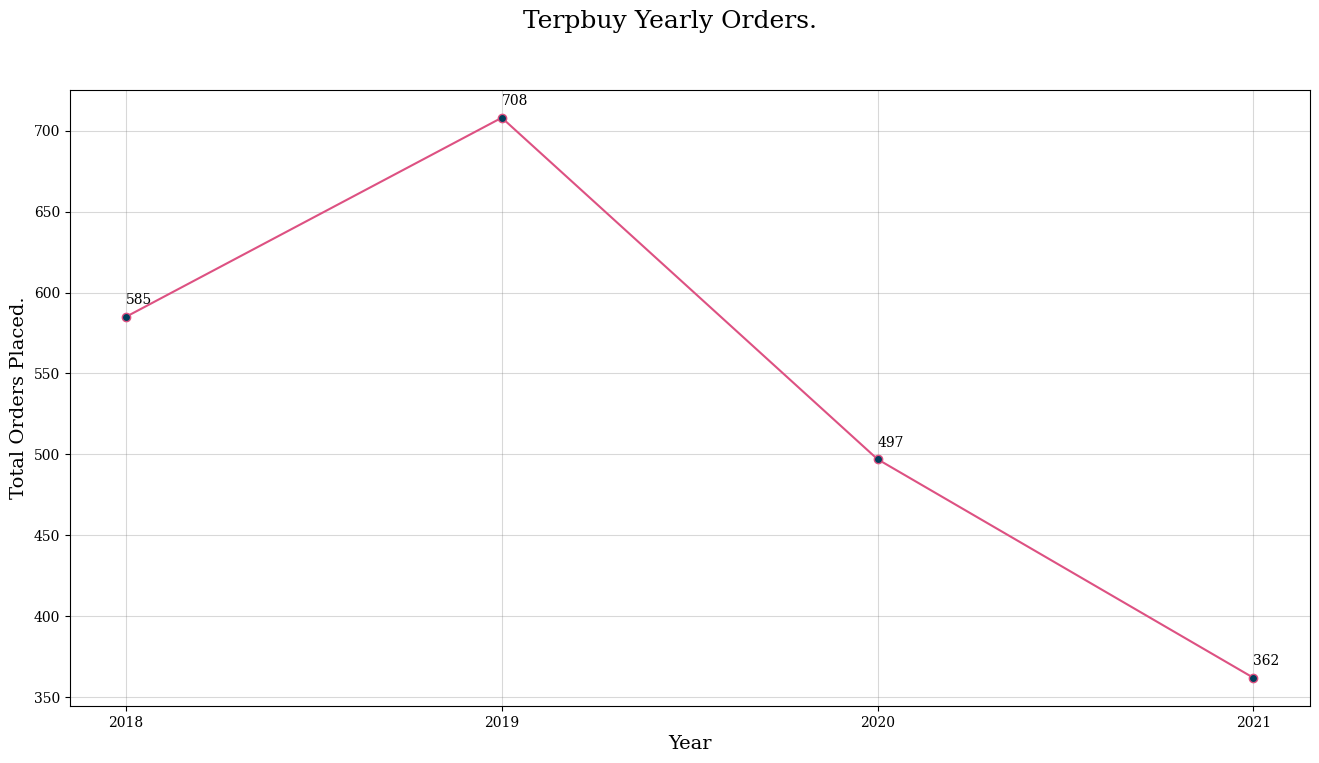

In [10]:
fig, ax = create_base_plot()

# Setting the label for the markers.
for xi, yi in zip(x, y):
    ax.text(xi, yi+8, yi, va='baseline',zorder=1000)


line_plot = ax.plot(x, y, linestyle='solid', marker='o', color='#dd5182', markerfacecolor='#003f5c', zorder=10)


fig.suptitle('Terpbuy Yearly Orders.', fontsize=18)


ax.set_xlabel('Year', fontsize=14)

ax.set_ylabel('Total Orders Placed.', fontsize=14)


plt.show()

<hr  style="border:1px dashed red;border-radius:50%;" />

### 4.3: Line Graph summary.

The summary of Yearly sales.
1. Year ___2019___ had most number of sales (708).
2. __2018 to 2019__ we saw ___upward trend___ and increase in sales of ___total 123 sales___.
3. From 2019 the sales started the downward trend.
4. Lowest sales were recorded in 2021 with only ___362___ sales.